In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
from cnnlib import utils, data_utils, functions
import torch.optim as optim
import torch.nn.functional as F
import torch.nn as nn
import numpy as np
from tqdm import tqdm
from cnnlib.model_builder import ModelBuilder

In [2]:
BATCH_SIZE = 512
NUM_OF_DATASET_WORKERS = 4
DATA_SET_DIR = "../../data"
DEVICE = utils.getDevice()

print(f'Using device - {DEVICE}')

Using device - cuda


Files already downloaded and verified
Files already downloaded and verified
Number of train images: 50000
Number of test images: 10000


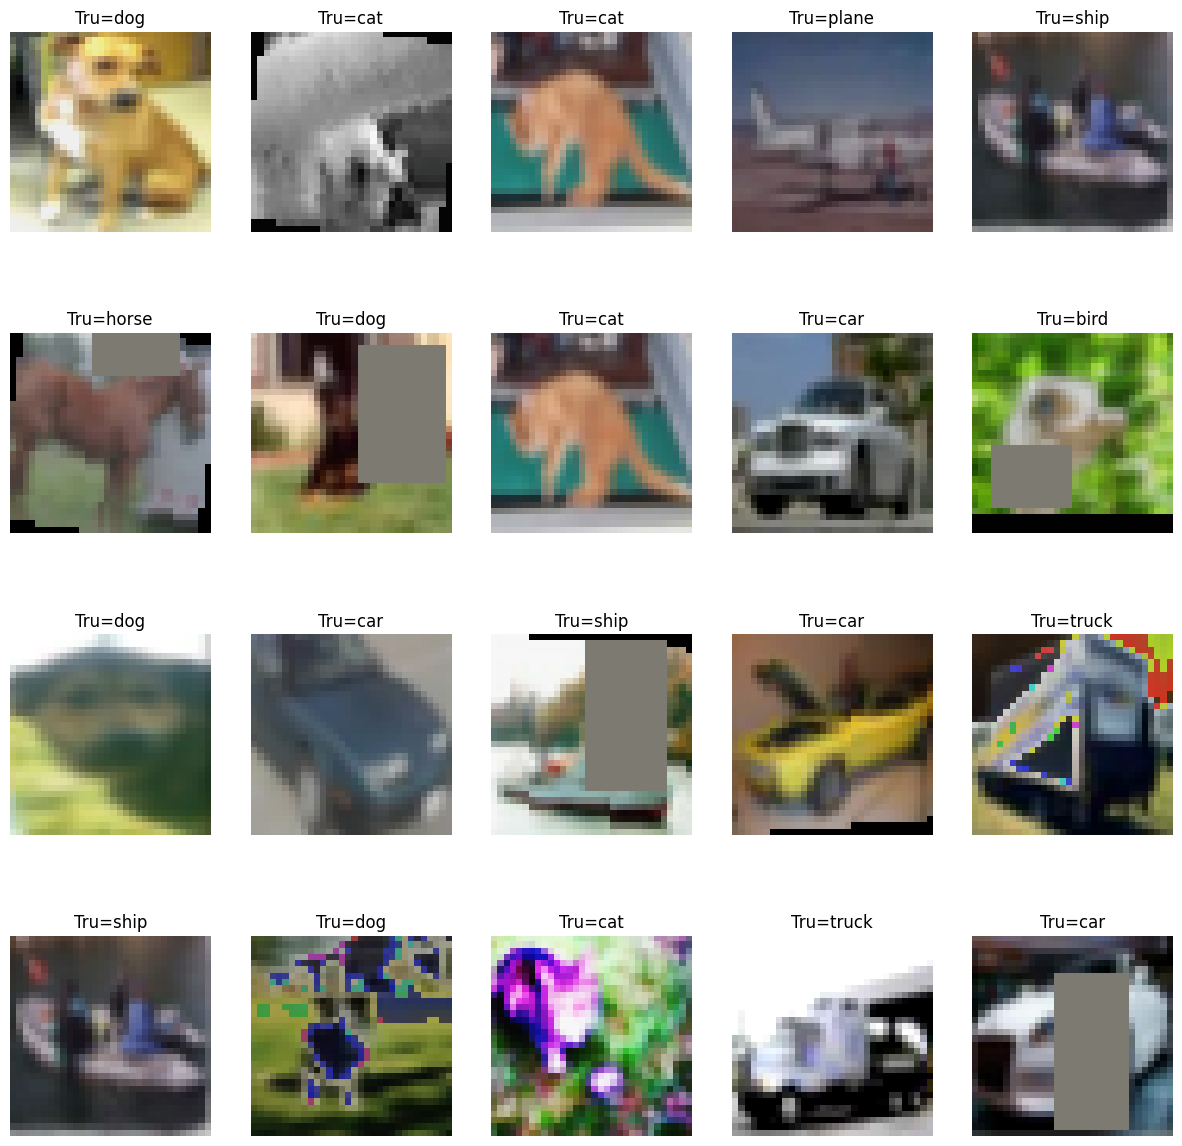

In [3]:
train_transform = transforms.Compose([
    transforms.RandomResizedCrop(32, scale=(0.75, 1.0), ratio=(1.0, 1.0)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandAugment(num_ops=1, magnitude=8),
    transforms.ColorJitter(0.1, 0.1, 0.1),
    transforms.ToTensor(),
    transforms.Normalize(utils.CIFAR10_MEAN, utils.CIFAR10_STD),
    transforms.RandomErasing(p=0.25)
])

test_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(utils.CIFAR10_MEAN, utils.CIFAR10_STD)
])

data = data_utils.download_CIFAR10(train_transform, test_transform, BATCH_SIZE)

data_utils.showLoaderImages(data.train, classes=data.classes, count=20, muSigmaPair=(utils.CIFAR10_MEAN, utils.CIFAR10_STD))

### Load the model

In [4]:
from cnnlib.models.conv_mixer import ConvMixer

depth = 10
hdim = 256
psize = 2
conv_ks = 5

net = ConvMixer(hdim, depth, conv_ks, psize)
net = nn.DataParallel(net, device_ids=[0]).cuda()


In [8]:
from cnnlib.lr_scheduler import CustomScheduler

epochs = 30

opt = optim.AdamW(net.parameters(), lr=0.01, weight_decay=0.01)

lr_schedule = lambda t : np.interp([t], [0, epochs*2//5, epochs*4//5, epochs], [0, 0.01, 0.01/20.0, 0])[0]
scheduler = CustomScheduler(opt, lr_schedule, len(data.train))

criterion = nn.CrossEntropyLoss()

## Next steps 
## To learn about clip norm (GradScaler)
## Change the model builder code to take in the lr schedule as input and update the learning rate 
## Run the model and notice the result 

scaler = torch.cuda.amp.GradScaler()


In [9]:
builder = ModelBuilder(net, data, criterion, opt, scheduler)
result = builder.fit(epochs)



Epoch: 1


100%|███████████████████████████████████████████████████████████████| 98/98 [00:20<00:00,  4.82it/s]


Train Accuracy: 87.242%, Train Loss: 0.0007196497754193842, Learning Rate: 8.503401360544217e-06


100%|███████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 14.23it/s]


Test Accuracy: 87.89%, Test Loss: 0.0007258605328388512


Epoch: 2


100%|███████████████████████████████████████████████████████████████| 98/98 [00:20<00:00,  4.86it/s]


Train Accuracy: 86.932%, Train Loss: 0.0007357794092968106, Learning Rate: 0.0008418367346938776


Epoch: 3


100%|███████████████████████████████████████████████████████████████| 98/98 [00:19<00:00,  4.95it/s]


Train Accuracy: 86.47%, Train Loss: 0.0007654073997400701, Learning Rate: 0.001675170068027211


Epoch: 4


100%|███████████████████████████████████████████████████████████████| 98/98 [00:20<00:00,  4.88it/s]


Train Accuracy: 85.576%, Train Loss: 0.0008065644651651382, Learning Rate: 0.0025085034013605442


Epoch: 5


100%|███████████████████████████████████████████████████████████████| 98/98 [00:19<00:00,  4.95it/s]


Train Accuracy: 85.02%, Train Loss: 0.0008428210858255625, Learning Rate: 0.003341836734693878


Epoch: 6


100%|███████████████████████████████████████████████████████████████| 98/98 [00:19<00:00,  4.95it/s]


Train Accuracy: 84.768%, Train Loss: 0.0008463520789518952, Learning Rate: 0.004175170068027211


100%|███████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 14.17it/s]


Test Accuracy: 85.84%, Test Loss: 0.000828815158456564


Epoch: 7


100%|███████████████████████████████████████████████████████████████| 98/98 [00:19<00:00,  4.99it/s]


Train Accuracy: 84.998%, Train Loss: 0.0008490622276440263, Learning Rate: 0.005008503401360545


Epoch: 8


100%|███████████████████████████████████████████████████████████████| 98/98 [00:20<00:00,  4.84it/s]


Train Accuracy: 84.96%, Train Loss: 0.0008480585529468954, Learning Rate: 0.005841836734693878


Epoch: 9


100%|███████████████████████████████████████████████████████████████| 98/98 [00:20<00:00,  4.82it/s]


Train Accuracy: 85.17%, Train Loss: 0.0008358582272194326, Learning Rate: 0.006675170068027211


Epoch: 10


100%|███████████████████████████████████████████████████████████████| 98/98 [00:20<00:00,  4.88it/s]


Train Accuracy: 85.242%, Train Loss: 0.0008349777781404555, Learning Rate: 0.007508503401360544


Epoch: 11


100%|███████████████████████████████████████████████████████████████| 98/98 [00:19<00:00,  4.95it/s]


Train Accuracy: 85.24%, Train Loss: 0.0008205032791011035, Learning Rate: 0.008341836734693877


100%|███████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 14.12it/s]


Test Accuracy: 85.74%, Test Loss: 0.0008318079053424299


Epoch: 12


100%|███████████████████████████████████████████████████████████████| 98/98 [00:19<00:00,  4.90it/s]


Train Accuracy: 85.56%, Train Loss: 0.0008093009819276631, Learning Rate: 0.00917517006802721


Epoch: 13


100%|███████████████████████████████████████████████████████████████| 98/98 [00:19<00:00,  4.95it/s]


Train Accuracy: 86.288%, Train Loss: 0.0007823857013136148, Learning Rate: 0.009991921768707484


Epoch: 14


100%|███████████████████████████████████████████████████████████████| 98/98 [00:19<00:00,  4.91it/s]


Train Accuracy: 87.744%, Train Loss: 0.0006949648959562182, Learning Rate: 0.009200255102040818


Epoch: 15


100%|███████████████████████████████████████████████████████████████| 98/98 [00:20<00:00,  4.88it/s]


Train Accuracy: 88.27%, Train Loss: 0.0006553488201461732, Learning Rate: 0.00840858843537415


Epoch: 16


100%|███████████████████████████████████████████████████████████████| 98/98 [00:20<00:00,  4.78it/s]


Train Accuracy: 89.22%, Train Loss: 0.0006078730802983046, Learning Rate: 0.0076169217687074835


100%|███████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 14.02it/s]


Test Accuracy: 87.49%, Test Loss: 0.0007320531876757741


Epoch: 17


100%|███████████████████████████████████████████████████████████████| 98/98 [00:19<00:00,  4.90it/s]


Train Accuracy: 90.172%, Train Loss: 0.0005506391171365976, Learning Rate: 0.006825255102040816


Epoch: 18


100%|███████████████████████████████████████████████████████████████| 98/98 [00:20<00:00,  4.69it/s]


Train Accuracy: 90.784%, Train Loss: 0.000510801502969116, Learning Rate: 0.006033588435374149


Epoch: 19


100%|███████████████████████████████████████████████████████████████| 98/98 [00:19<00:00,  4.93it/s]


Train Accuracy: 91.478%, Train Loss: 0.00048205506755039096, Learning Rate: 0.005241921768707482


Epoch: 20


100%|███████████████████████████████████████████████████████████████| 98/98 [00:19<00:00,  4.96it/s]


Train Accuracy: 92.448%, Train Loss: 0.000431147578638047, Learning Rate: 0.004450255102040816


Epoch: 21


100%|███████████████████████████████████████████████████████████████| 98/98 [00:20<00:00,  4.83it/s]


Train Accuracy: 93.194%, Train Loss: 0.0003904788463842124, Learning Rate: 0.003658588435374149


100%|███████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.95it/s]


Test Accuracy: 91.33%, Test Loss: 0.0005559892160817981


Epoch: 22


100%|███████████████████████████████████████████████████████████████| 98/98 [00:20<00:00,  4.85it/s]


Train Accuracy: 93.612%, Train Loss: 0.00035169374314136803, Learning Rate: 0.002866921768707483


Epoch: 23


100%|███████████████████████████████████████████████████████████████| 98/98 [00:20<00:00,  4.88it/s]


Train Accuracy: 94.212%, Train Loss: 0.000325155007885769, Learning Rate: 0.0020752551020408166


Epoch: 24


100%|███████████████████████████████████████████████████████████████| 98/98 [00:19<00:00,  4.92it/s]


Train Accuracy: 94.9%, Train Loss: 0.0002905178116634488, Learning Rate: 0.0012835884353741486


Epoch: 25


100%|███████████████████████████████████████████████████████████████| 98/98 [00:20<00:00,  4.87it/s]


Train Accuracy: 95.104%, Train Loss: 0.0002733827568590641, Learning Rate: 0.0004991496598639454


Epoch: 26


100%|███████████████████████████████████████████████████████████████| 98/98 [00:19<00:00,  4.91it/s]


Train Accuracy: 95.34%, Train Loss: 0.0002650657552294433, Learning Rate: 0.0004158163265306122


100%|███████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.97it/s]


Test Accuracy: 92.4%, Test Loss: 0.0005082233692519367


Epoch: 27


100%|███████████████████████████████████████████████████████████████| 98/98 [00:20<00:00,  4.89it/s]


Train Accuracy: 95.544%, Train Loss: 0.0002584993198979646, Learning Rate: 0.0003324829931972788


Epoch: 28


100%|███████████████████████████████████████████████████████████████| 98/98 [00:19<00:00,  4.97it/s]


Train Accuracy: 95.502%, Train Loss: 0.00025680643739178777, Learning Rate: 0.0002491496598639455


Epoch: 29


100%|███████████████████████████████████████████████████████████████| 98/98 [00:19<00:00,  4.98it/s]


Train Accuracy: 95.664%, Train Loss: 0.00024557241704314947, Learning Rate: 0.00016581632653061217


Epoch: 30


100%|███████████████████████████████████████████████████████████████| 98/98 [00:20<00:00,  4.88it/s]


Train Accuracy: 95.584%, Train Loss: 0.0002504521398805082, Learning Rate: 8.248299319727886e-05


100%|███████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 14.23it/s]

Test Accuracy: 92.23%, Test Loss: 0.0005173158715479076
